<a href="https://colab.research.google.com/github/Krylze/Data-Science/blob/main/Desarrollar_An%C3%A1lisis_Descriptivo_Caso_de_Estudio_Scala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Cargar datos en dataframes
pulls  = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/Data/pulls.csv')
pulls_files = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/Data/pull_files.csv')
pulls.info()
print("===============")
pulls_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6200 non-null   int64 
 1   user    6200 non-null   object
 2   date    6200 non-null   object
dtypes: int64(1), object(2)
memory usage: 145.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85588 entries, 0 to 85587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     85588 non-null  int64 
 1   file    85588 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
# Convertir cadenas a Datetime
pulls.date = pd.to_datetime(pulls.date, format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
pulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   pid     6200 non-null   int64         
 1   user    6200 non-null   object        
 2   date    6200 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 145.4+ KB


In [ ]:
# Fusionar DataFrames
data = data = pd.merge(pulls, pulls_files, on='pid', how='outer') # usar función pf.merge tome en cuenta la columna pid de ambos dataframes
data.sample(5)

,pid,user,date,file
82187,117896913,lrytz,2017-04-27 09:34:39,src/reflect/scala/reflect/internal/TreeGen.scala
3052,1117629,dlwh,2012-04-06 05:30:48,src/compiler/scala/tools/cmd/FromString.scala
499,617481,jsuereth,2011-12-21 01:29:07,project/project/Build.scala
1629,835721,dcsobral,2012-02-15 22:19:39,src/library/scala/sys/process/ProcessIO.scala
24278,2919907,paulp,2012-11-07 21:13:47,src/compiler/scala/tools/nsc/io/Pickler.scala


<Axes: xlabel='year_month'>

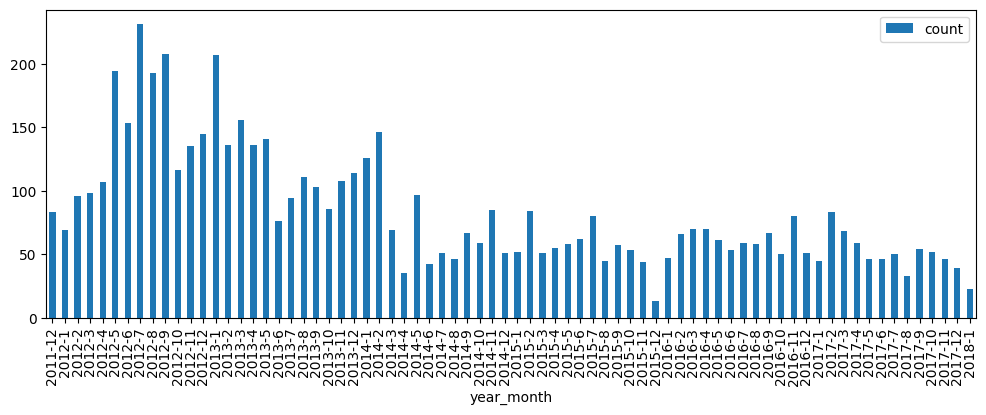

In [ ]:
# Convertir las columnas 'year' y 'month' en una sola columna para el eje x
counts['year_month'] = counts['year'].astype(str) + '-' + counts['month'].astype(str)

# Graficar resultados utilizando la nueva columna 'year_month' como eje x
counts.plot(kind='bar', x='year_month', y='count', figsize=(12, 4)) # plot bar chart with year/month on x-axis and count on y-axis

<Axes: ylabel='Frequency'>

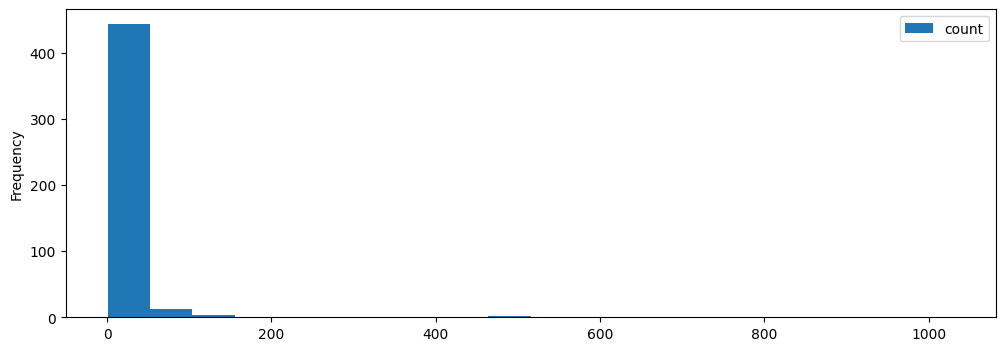

In [ ]:
# Agrupar por usuario y contar la cantidad de pull requests
by_user = pulls.groupby('user')['pid'].count().reset_index(name='count')

# Graficar histograma de la columna 'count' (cantidad de pull requests por usuario)
by_user.plot.hist(column='count', bins=20, figsize=(12, 4))

In [ ]:
# Identificar los últimos 10 pull requests
top_ten = pulls.sort_values(by=['date'], ascending=False).head(10) # Sort by 'date' in descending order and take the top 10

# Unir top_ten con pull_files usando merge
join_pr = pd.merge(top_ten, pulls_files, on='pid') # Merge on the common column 'pid'

# Eliminar archivos repetidos
files = set(join_pr['file']) # set transforms the 'file' column to a set, removing duplicates

# Imprimir resultados
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [ ]:
# Archivo en el que estamos interesados:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identificamos que commits modificaron el archivo
file_pr = data[data['file'] == file] # Filtrar data con la columna file igual a la variable file

# Contamos el numero de cambios por cada developer
developer_num = file_pr.groupby('user')['pid'].count().reset_index(name='count') # Agrupar por usuario, seleccionar columna pid y contar

# Imprimir los resultados
print(developer_num)

            user  count
0   bjornregnell      1
1          densh      1
2   gkossakowski      1
3         melloc      1
4        odersky      2
5          paulp      2
6       retronym      5
7            soc      4
8      starblood      1
9        xeno-by     11
10     zuvizudar      1


In [ ]:
# Archivo en el que estamos interesados:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Seleccionamos los pull request que cambiaron al archivo de interes
# usar la variable data
file_pr = data[data['file'] == file]

# Buscamos los usuarios de las ultimas 10 pull requests
users_last_10 = set(file_pr.nlargest(10, 'date')['user'])

# Eliminar usuarios repetidos
# set_users = set(users_last_10) # No es necesario, ya que users_last_10 ya es un set

# Imprimimos resultados
print(users_last_10)

{'retronym', 'starblood', 'zuvizudar', 'bjornregnell', 'xeno-by', 'soc'}


<Axes: xlabel='date'>

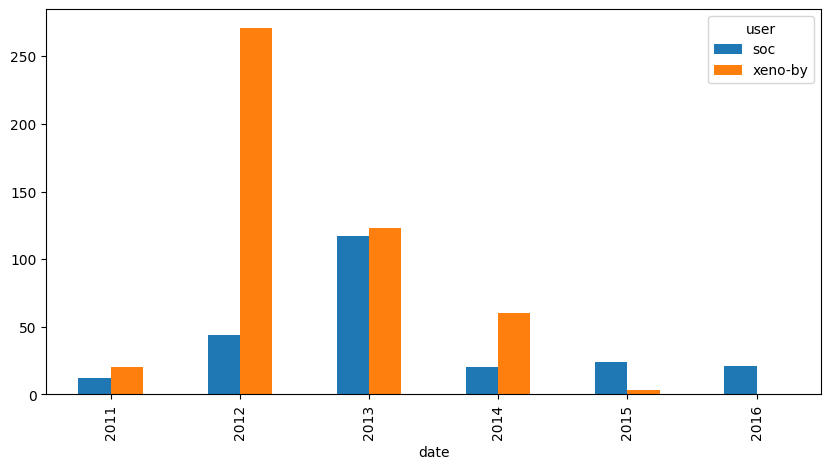

In [ ]:
# Los desarrolladores en los que estamos interesados:
authors = ['xeno-by', 'soc']

# Traer todos los pull requests de esos desarrolladores (pulls):
# Investigar método isin de pandas
by_author = pulls[pulls['user'].isin(authors)]

# Contar el número de pull requests de cada año, agrupar por usuario, año.
counts = by_author.groupby(['user', pulls['date'].dt.year])['pid'].count().reset_index(name='count')

# Convertir tabla. Los usuarios pasan a columnas, los años a indices y los valores será el conteo de pull requests
counts_wide = counts.pivot(index='date', columns='user', values='count')

# Grafica de barra de los resultados
counts_wide.plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='date'>

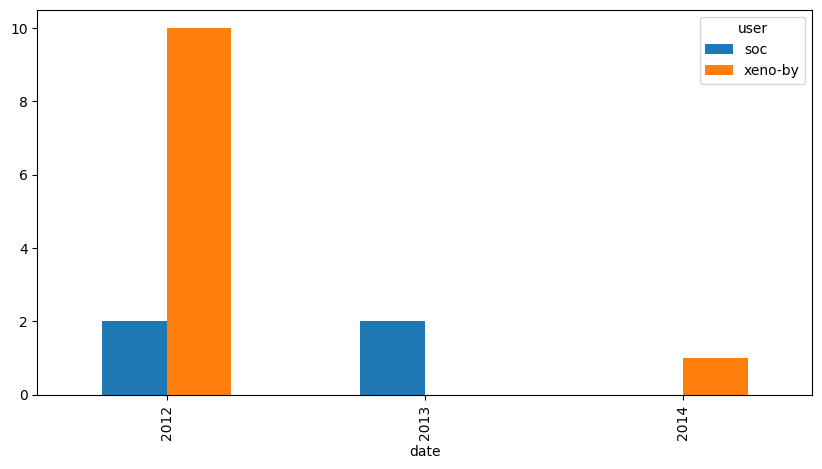

In [ ]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Filtrar dataframe por autor. Puede usar la variable data.
by_author = data[data['user'].isin(authors)]

# Filtrar resultado anterior por determinado archivo
by_file = by_author[by_author['file'] == file]

# Agrupar y contar el número de pull requests echos por cada usuario en cada año. Agrupar por usuario y año
grouped = by_file.groupby(['user', by_file['date'].dt.year])['pid'].count().reset_index(name='count')

# Convertir tabla usando pivot table, los index serán el año, las columnas los usuarios, y los valores será el conteo de pid. Valores default 0.
by_file_wide = grouped.pivot_table(index='date', columns='user', values='count', fill_value=0)

# Grafica de barra de los resultados
by_file_wide.plot(kind='bar', figsize=(10, 5))